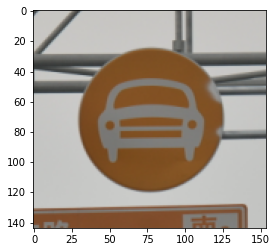

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "images_data/Dataset2/testing"#we create our variable with the direction of our fist dataset

CATEGORIES = ["car", "cross"]#we set our categories 

for category in CATEGORIES:  # do cars and cross-cars
    path = os.path.join(DATADIR,category)  # create cars to dogs and cross-cars
    for img in os.listdir(path):  # iterate over each image per cars and cross-cars
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display

        break 
    break  

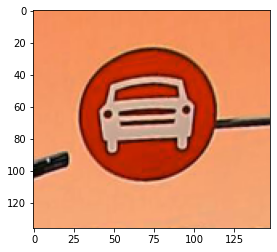

In [92]:
DATADIR2 = "images_data/Dataset2/training" #we create our variable with the directions of our second dataset

CATEGORIES2 = ["car", "cross"]#we set our categories 

for category in CATEGORIES2:  # do car and cross-cars
    path2 = os.path.join(DATADIR2,category)  # create path to cars and cross-cars
    for img in os.listdir(path2):  # iterate over each image per cars and cross-cars
        img_array2 = cv2.imread(os.path.join(path2,img))  # convert to array
        plt.imshow(img_array2)  # graph it
        plt.show()  # display!

        break 
    break 

In [93]:
IMG_SIZE = 500 #set a size*size per imga in order to normalize data input

In [94]:
training_data = []

def create_training_data():
    for category in CATEGORIES2:  # do cars and cross-cars

        path2 = os.path.join(DATADIR2,category)  # create path to cars and cross-cars
        class_num = CATEGORIES2.index(category)  # get the classification  (0 or a 1). 0=car 1=cross-cars

        for img in tqdm(os.listdir(path2)):  # iterate over each image per cars and cross-cars
            try:
                #img_array = cv2.imread(os.path.join(path2,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                img_array = cv2.imread(os.path.join(path2,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()

print(len(training_data))

100%|██████████| 150/150 [00:02<00:00, 51.60it/s]

300


In [95]:
testing_data = []

def create_training_data():
    for category in CATEGORIES:  # do cars and cross-cars

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=cars 1=cross-cars

        for img in tqdm(os.listdir(path)):  # iterate over each image per cars and cross-cars
            try:
                #img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                testing_data.append([new_array, class_num])  # add this to our training
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            
create_training_data()#with this funtion we create out dataset

print(len(testing_data))

100%|██████████| 50/50 [00:00<00:00, 53.62it/s]

100


In [12]:
import random #this library allow us to mix our dataset in order to have a better training variance
random.shuffle(training_data)#mix the training data
random.shuffle(testing_data)#mix the testing data

In [96]:
Img_train = []
Lab_train = []
Img_test = []
Lab_test = []

for features,label in training_data:#we extract the values from our datasets
    Img_train.append(features)#Rgb matrix
    Lab_train.append(label)#labels
    
for features,label in testing_data:
    Img_test.append(features)#Rgb matrix
    Lab_test.append(label)#Labels


In [97]:
orb = cv2.ORB_create(nfeatures=800) #we create our ORB function with 800 keypoint max
dessSizeE=[]
dessSizeP=[]
trainDess=[]
testDess=[]
Lab_Dess_train=[]
Lab_Dess_test=[]
for c in range(len(Img_train)): #this loop is to get the keypoints and descriptors from our datasets
    keypoints, descriptors=orb.detectAndCompute(Img_train[c], None) #we use the ORB function to calculate the # of keypoints and generate the descriptors
    dessSizeE.append(len(keypoints))#we save the number of keypoints in this list
    for i in range(len(descriptors)): #this loop saves the descriptors of eack keypoint
        trainDess.append(descriptors[i,:]) #this list saves the descriptors
        Lab_Dess_train.append(Lab_train[c])#this list saves the label of the descriptor
        
for f in range(len(Img_test)): #this loop is to get the keypoints and descriptors from our datasets
    keypoints2, descriptors2=orb.detectAndCompute(Img_test[f], None) #we use the ORB function to calculate the # of keypoints and generate the descriptors
    dessSizeP.append(len(keypoints2))#we save the number of keypoints in this list
    for g in range(len(descriptors2)):  #this loop saves the descriptors of eack keypoint
        testDess.append(descriptors2[g,:]) #this list saves the descriptors
        Lab_Dess_test.append(Lab_test[f])#this list saves the label of the descriptor
        
trainDess=np.array(trainDess).reshape(-1,32)#this allow us to convert our list of values into an array with the descriptor so we can use it in the neural network training
testDess=np.array(testDess).reshape(-1,32)


In [98]:
import keras #importants libraries in order to use the np functions, keras, plots and time
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [99]:
# one-hot encoding
from keras.utils import to_categorical
# netrork architecture
from keras import models
from keras import layers
from keras import optimizers

if 'network' in globals(): del network            
network = models.Sequential() # to start a new Secuential NN 
network.add(layers.Dense(units=200, activation='relu', input_shape=(32,), name='dense1'))#we add a dense input layer (first layer) with 200 neurons, ReLu activaton funtion, input shape 32*1 
network.add(layers.Dense(units=100, activation='relu'))#we add a dense layer (second hidden layer)
network.add(layers.Dense(units=50, activation='relu'))#we add a dense layer (third hidden layer)
network.add(layers.Dense(units=25, activation='relu'))#we add a dense layer (fourth hidden layer)
network.add(layers.Dense(units=10, activation='relu'))#we add a dense layer (fifth hidden layer)
network.add(layers.Dense(units=2, activation='softmax', name='classifier'))#finally we add our output layer with softmax Activation function

opt = optimizers.RMSprop(lr=0.001) 
network.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])#we define our optimizer, loss function and our metrics.
 
tic = time()#define our time 
history = network.fit(trainDess, Lab_Dess_train ,epochs=10, batch_size=32, validation_split=.16666)#this part is the trainning oof the neural network.
print('total training time:', time()-tic, 'seconds')

Train on 88788 samples, validate on 17757 samples
Epoch 1/10
88788/88788 [==============================] - 7s 78us/step - loss: 0.6400 - accuracy: 0.6886 - val_loss: 0.4804 - val_accuracy: 0.8169
Epoch 2/10
88788/88788 [==============================] - 7s 81us/step - loss: 0.5367 - accuracy: 0.7431 - val_loss: 0.5924 - val_accuracy: 0.7285
Epoch 3/10
88788/88788 [==============================] - 7s 75us/step - loss: 0.5300 - accuracy: 0.7611 - val_loss: 0.4328 - val_accuracy: 0.8510
Epoch 4/10
88788/88788 [==============================] - 7s 78us/step - loss: 0.5143 - accuracy: 0.7761 - val_loss: 0.3505 - val_accuracy: 0.8936
Epoch 5/10
88788/88788 [==============================] - 7s 76us/step - loss: 0.5060 - accuracy: 0.7814 - val_loss: 0.2463 - val_accuracy: 0.9769
Epoch 6/10
88788/88788 [==============================] - 7s 76us/step - loss: 0.5158 - accuracy: 0.7899 - val_loss: 0.3507 - val_accuracy: 0.8780
Epoch 7/10
88788/88788 [==============================] - 7s 78us/st

In [100]:
print(network.summary())#we print the summary of out training in order to see how many parameters received each layer

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 200)               6600      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                260       
_________________________________________________________________
classifier (Dense)           (None, 2)                 22        
Total params: 33,307
Trainable params: 33,307
Non-trainable params: 0
__________________________________________________

In [101]:
results = network.evaluate(testDess, Lab_Dess_test)#with this function we observe the accuracy and loss
print('results loss:', results[0])
print('results accuracy:', results[1])


42704/42704 [==============================] - 1s 33us/step
results loss: 0.6842662740195901
results accuracy: 0.7235856056213379


In [102]:
history_dict = history.history#we use this function to analize the objective funtion behavior and metrics.
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

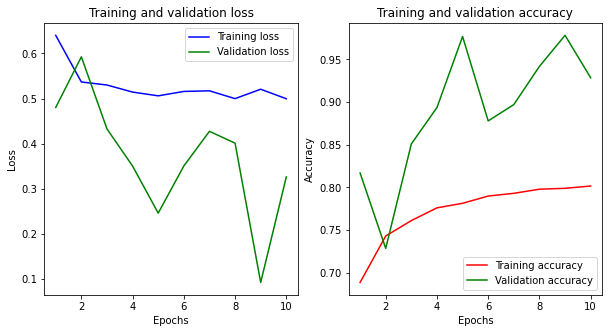

In [103]:
acc = history.history['accuracy']#this part is the plotting of the last line explained
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

# figure
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

C:\Users\kevin hernandez\anaconda3\envs\keras\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


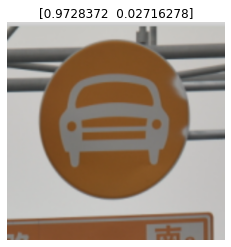

In [104]:
#this section we test our neural network with out test images
pred = network.predict(testDess)
plt.imshow(Img_test[49], cmap='gray')
plt.title(pred[49])
plt.axis('off')   
plt.show()


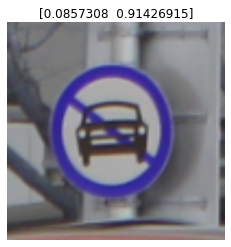

In [105]:
#this section we test our neural network with out test images
plt.imshow(Img_test[99], cmap='gray')
plt.title(pred[99])
plt.axis('off')   
plt.show()

In [106]:
pred=np.array(pred).reshape(-1,2)#this allow us to convert our list of values into an array with the descriptor so we can use it in the neural network training

In [107]:
l1 = [item[0] for item in pred]#in this list we save the first values of our predictions

In [108]:
l2 = [item[1] for item in pred]#in this list wwe save the second values of our predictions

In [109]:
#in this part we compare the both lists in order to get the higher one and define which type of image is
l3=[]
for i in range(len(l1)):
    if(l1[i]<l2[i]):
        l3.append(1)
    else:
        l3.append(0)
        

In [113]:
#in this part we set the correct label from the test dataset
lr=[]
for i in range(21352):
    lr.append(0)
for j in range(21352,42704):
    lr.append(1)

In [121]:
#in this part we generate the confusion matrix in order to see how was the performance of our neural network
from pandas_ml import ConfusionMatrix
conf_matrix = ConfusionMatrix(lr, l3)
print(conf_matrix)

Predicted  False   True  __all__
Actual                          
False       8961  12391    21352
True        1449  19903    21352
__all__    10410  32294    42704
